Última atualização: 02/02/2026

## Sumário

1. [Introdução e contextualização](#1introducao-e-contextualizacao)
   - [1.1 Contexto do INMET e importância das estações meteorológicas](##11-contexto-do-inmet-e-importancia-das-estacoes-meteorologicas)
   - [1.2 Descrição da base de dados](#12-descricao-da-base-de-dados)
   - [1.3 Escopo da análise](#13-escopo-da-analise)

2. [Configurações basicas](#2-configuracoes-basicas)
   - [2.1 Importando pacotes](#21-importanto-pacotes)
   - [2.2 Configurando ambiente](#22-configurando-ambiente)
   - [2.3 Carregando dados](#23-carregando-dados)


3. [Entendimento da tabela de estações](#3-entendimento-da-tabela-de-estacoes)
   - [3.1 Entendimento da estrutura da tabela](#31-entendimento-da-estrutura-da-tabela)
   - [3.2 Análise de qualidade e consistência dos dados](#32-analise-de-qualidade-e-consistencia-dos-dados)
   - [3.3 Tipos dos dados](#33-tipos-dos-dados)
   - [3.4 Verificação de outliers](#34-verificacao-de-outliers)

4. [Análise Descritiva Geral das Estações, entendiment do perfil geral das estações](#4-analise-descritiva-geral-das-estacoes-entendiment-do-perfil-geral-das-estacoes)
   - [4.1 Número total de estações na base de dados](#41-numero-total-de-estacoes-na-base-de-dados)
   - [4.2 Distribuição por região e estado (UF)](#42-distribuicao-por-regiao-e-estado-uf)
   - [4.3 Ranking de estados com mais estações](#43-ranking-de-estados-com-mais-estacoes)
   - [4.4 Relação entre estação e região](#44-relacao-entre-estacao-e-regiao)

5. [Distribuição Espacial das Estações](#5-distribuicao-espacial-das-estacoes)
   - [5.1 Análise de latitude e longitude](#51-analise-de-latitude-e-longitude)
   - [5.2 Visualização espacial](#52-visualizacao-espacial)
   - [5.3 Densidade de estações](#53-densidade-de-estacoes)
   - [5.4 Discussão sobre cobertura territorial](#54-discussao-sobre-cobertura-territorial)

6. [Análise altimétrica das Estações](#6-analise-altimetrica-das-estacoes)
   - [6.1 Análise das altitudes](#61-analise-das-altitudes)
   - [6.2 Possíveis implicações meteorológicas](#62-possiveis-implicacoes-meteorologicas)

7. [Análise temporal](#7-analise-temporal)
   - [7.1 Análise do tempo de fundação e determinação da idade das estações](#71-analise-do-tempo-de-fundacao-e-determinacao-da-idade-das-estacoes)
   - [7.2 Distribuição temporal](#72-distribuicao-temporal)
   - [7.3 Comparação entre regiões (Regiões com estações mais antigas vs. mais recentes)](#73-comparacao-entre-regioes-regioes-com-estacoes-mais-antigas-vs-mais-recentes)
   - [7.4 Estações históricas  e babies](#74-estacoes-historicas--e-babies)

8. [Principais insights e conclusão](#8-principais-insights-e-conclusao)

9. [Próximos passos](#9-proximos-passos)


<a id="1introducao-e-contextualizacao"></a>

## **1. Introducao e contextualizacao**


<a id = "11-contexto-do-inmet-e-importancia-das-estacoes-meteorologicas"></a>

### 1.1 Contexto do INMET e importância das estações meteorológicas

O Instituto Nacional de Meteorologia (INMET) é o órgão oficial do governo brasileiro responsável pelo monitoramento, coleta, processamento e disseminação de informações meteorológicas em âmbito nacional. Vinculado ao Ministério da Agricultura e Pecuária, o INMET desempenha um papel fundamental no suporte a diversas atividades socioeconômicas, como a agricultura, a gestão de recursos hídricos, a defesa civil, a aviação, o planejamento urbano e a mitigação de desastres naturais.

Entre as principais atribuições do INMET destacam-se o monitoramento do tempo e do clima, a previsão meteorológica e climática, a emissão de avisos de eventos severos e o desenvolvimento de produtos voltados ao apoio à agricultura, incluindo atividades de pesquisa e desenvolvimento. Para isso, são utilizados modelos físico-matemáticos de última geração e alta resolução, processados em supercomputadores, que simulam o comportamento futuro da atmosfera e permitem a elaboração de previsões com dias de antecedência, em conformidade com padrões internacionais. Imagens obtidas por satélites também constituem ferramentas essenciais no monitoramento e na previsão do tempo.

A principal infraestrutura utilizada pelo INMET para a obtenção de dados meteorológicos é a sua rede de estações meteorológicas, distribuídas ao longo do território brasileiro. Essas estações, em especial as automáticas, realizam medições contínuas de variáveis atmosféricas, possibilitando o acompanhamento das condições meteorológicas locais e regionais ao longo do tempo. A ampla extensão territorial e a diversidade climática do Brasil tornam essa rede fundamental para a adequada representação das distintas realidades climáticas do país.

As estações meteorológicas desempenham um papel estratégico não apenas na observação das condições atmosféricas instantâneas, mas também na construção de séries históricas de dados, que são essenciais para estudos climatológicos, modelagem atmosférica e análises de tendências de longo prazo. Características como a localização geográfica, a altitude, a densidade espacial e a idade das estações influenciam diretamente a qualidade, a representatividade e a confiabilidade das informações produzidas.

Nesse contexto, compreender as características das estações meteorológicas do INMET, incluindo sua distribuição espacial, cobertura territorial e evolução temporal, constitui um passo fundamental para avaliar a robustez da rede observacional brasileira e suas potencialidades para aplicações científicas e operacionais.

Referência: ([ Portal INMET](https://portal.inmet.gov.br/sobre))

<a id= "12-descricao-da-base-de-dados"></a>

### 1.2 Descrição da base de dados

A base de dados atualmente é formada por duas tabelas denominadas por weather_data e stations. Na imagem a seguir está exposta a estrutura de cada tabela  com suas variáveis e seus respectivos tipos.

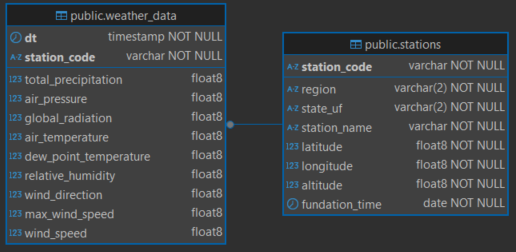

A tabela weather_data é uma tabela fato, e nela há dados meteorológicos horários dos últimos 25 anos (2000 - 2025) para todas as estações do INMET. A outra tabela apresentada é a stations, que é uma tabela dimensão, e nela há informações mais detalhadas sobre cada estação, como latitude, longitude, data de fundação e dentre outras informações.

Cada estação tem um código único que a caracteriza (station_code), e ambas as tabelas podem ser relacionadas através desse código. Dessa forma, é possível obter os dados e metadados para qualquer estação contida na base de dados somente realizando joins e filtros nos códigos das estações e na data de aquisição das medidas meteorológicas.

<a id= "13-escopo-da-analise"></a>

### 1.3 Escopo da análise

A presente análise tem como principal objetivo aprofundar a compreensão acerca das estações meteorológicas automáticas mantidas pelo Instituto Nacional de Meteorologia (INMET). Busca-se investigar diferentes aspectos dessas estações, tais como sua localização geográfica, densidade espacial, idade, altitude, cobertura territorial, entre outras características relevantes.

Vale a pena observar que esta análise não contempla o estudo dos dados meteorológicos propriamente ditos. O foco deste notebook/análise está restrito às características das estações, conforme descritas na tabela de estações (stations) do conjunto de dados.

<a id="2-configuracoes-basicas"></a>

## **2. Configurações basicas**

<a id= "#21-importanto-pacotes"></a>

### 2.1 Importando pacotes

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dotenv import load_dotenv
from sqlalchemy import create_engine

<a id= "#22-configurando-ambiente"></a>

### 2.2 Configurando ambiente

In [2]:
load_dotenv()

source = os.getenv('hist_source')
user = os.getenv('POSTGRES_USER')
password = os.getenv('POSTGRES_PASSWORD')
host = os.getenv('POSTGRES_HOST')
port = os.getenv('POSTGRES_PORT')
database = os.getenv('POSTGRES_DATABASE')
engine = create_engine(f"postgresql+psycopg://{user}:{password}@{host}:{port}/{database}")

<a id= "#23-carregando-dados"></a>

### 2.3 Carregando dados

In [3]:
query = ''' 
        SELECT *
        FROM stations
'''

estacoes = pd.read_sql(query,engine)
estacoes.head()

,region,state_uf,station_name,station_code,latitude,longitude,altitude,fundation_time
0,se,es,alegre,a617,-20.750556,-41.488889,138.00,2006-10-25
1,n,to,gurupi,a019,-11.745782,-49.049703,279.07,2006-12-20
2,co,ms,ivinhema,a709,-22.300421,-53.822895,377.36,2003-08-02
3,co,ms,campo grande,a702,-20.447195,-54.722615,528.47,2001-10-09
4,co,ms,tres lagoas,a704,-20.783333,-51.712222,328.94,2001-03-09


<a id = "3-entendimento-da-tabela-de-estacoes"></a>

## **3. Entendimento da tabela de estações**

<a id= "31-entendimento-da-estrutura-da-tabela"></a>

### 3.1 Entendimento da estrutura da tabela

<a id= "32-analise-de-qualidade-e-consistencia-dos-dados"></a>

### 3.2 Análise de qualidade e consistência dos dados

<a id= "33-tipos-dos-dados"></a>

### 3.3 Tipos dos dados

<a id= "34-verificacao-de-outliers"></a>

### 3.4 Verificação de outliers

<a id="4-analise-descritiva-geral-das-estacoes-entendiment-do-perfil-geral-das-estacoes"></a>

## **4. Análise Descritiva Geral das Estações, entendiment do perfil geral das estações**

<a id= "41-numero-total-de-estacoes-na-base-de-dados"></a>

### 4.1 Número total de estações na base de dados

<a id="42-distribuicao-por-regiao-e-estado-uf"></a>

### 4.2 Distribuição por região e estado (UF)

<a id = "43-ranking-de-estados-com-mais-estacoes"></a>

### 4.3 Ranking de estados com mais estações

<a id = "44-relacao-entre-estacao-e-regiao"></a>

### 4.4 Relação entre estação e região

<a id="5-distribuicao-espacial-das-estacoes"></a>

## **5. Distribuição Espacial das Estações**

<a id= "51-analise-de-latitude-e-longitude"></a>

### 5.1 Análise de latitude e longitude

<a id="52-visualizacao-espacial"></a>

### 5.2 Visualização espacial

<a id="53-densidade-de-estacoes"></a>

### 5.3 Densidade de estações

<a id="54-discussao-sobre-cobertura-territorial"></a>

### 5.4 Discussão sobre cobertura territorial

<a id= "6-analise-altimetrica-das-estacoes"></a>

## **6. Análise altimétrica das Estações**

<a id="61-analise-das-altitudes"></a>

### 6.1 Análise das altitudes

<a id="62-possiveis-implicacoes-meteorologicas"></a>

### 6.2 Possíveis implicações meteorológicas

<a id="7-analise-temporal"></a>

## **7. Análise temporal**

<a id="71-analise-do-tempo-de-fundacao-e-determinacao-da-idade-das-estacoes"></a>

### 7.1 Análise do tempo de fundação e determinação da idade das estações

<a id= "72-distribuicao-temporal"></a>

### 7.2 Distribuição temporal

<a id="73-comparacao-entre-regioes-regioes-com-estacoes-mais-antigas-vs-mais-recentes"></a>

### 7.3 Comparação entre regiões (Regiões com estações mais antigas vs. mais recentes)

<a id="74-estacoes-historicas--e-babies"></a>

### 7.4 Estações históricas  e babies

<a id ="8-principais-insights-e-conclusao"></a>

# **8. Principais insights e conclusão**

<a id="9-proximos-passos"></a>

## **9. Próximos passos**